# ***MSDS686-Deep Learning: Final Kaggle Project***

`Student Name: Chennakeshava Akhil Pillalamarri`

`Student ID: 3043182`

## `Overview of the Project`


This project applies deep learning techniques to classify military vehicle images into multiple categories such as tanks, armored personnel carriers, anti-aircraft units, and other combat vehicles. The goal is to evaluate the effectiveness of various convolutional neural network (CNN) architectures — both custom-built and pretrained — for accurate recognition of visually similar vehicle types.  

The assignment demonstrates how transfer learning and fine-tuning can improve performance on a relatively small, domain-specific dataset, while also comparing model complexity, accuracy, and efficiency across architectures.


## `***Dataset Description***`

The dataset I am going to use for this final project is `The Military Vehicles Dataset` by Aman Raj Bose, for which the kaggle link is: https://www.kaggle.com/datasets/amanrajbose/millitary-vechiles. The Military Vehicles dataset, which was made by Aman Raj Bose and published on Kaggle is descirbed as below:
- an image dataset containg of approximately 18,600 image files
- Contains 10 classes of vehicles in it which are:
    - Anti-Aircraft
    - Armored Combat Support Vehicles
    - Armored personnel carriers
    - Infantry Fighting Vehicles
    - Light Armored Vehicles
    - Light Utility Vehicles
    - Mine-Protected Vehicles
    - Prime Movers and Trucks
    - Self-Propelled Artillery
    - Tanks
- All the image files have been labelled and those labels are provided
- The Dataset is already seperated into Train, Test and Validation sets

## `**Methods to be used in this Project**`

In this project i am going to use the following concepts which were taught to me during this course:

1. Optimizers for each layer of the model
2. Loss functions and different evaluation metrics
3. Max Pooling
4. Variations in Epochs, Batch Sizes and Learning rates of how those affect the model
5. Dropout and Regularization concepts
6. Creating a plot function for plotting the Loss and accuracy for Training and Validation sets
7. Varying depths, Kernels and Normalization Functions
8. Data Augmentation
9. Transfer Learning Models and finetuning with trainable and non-trainable parameters



The modeling approach follows a systematic deep learning workflow:

1. **Baseline Model:**  
   A custom CNN was implemented from scratch to establish a performance benchmark.

2. **Transfer Learning:**  
   Multiple pretrained networks (ResNet50V2, DenseNet201, InceptionV3, and EfficientNetB0) were fine-tuned on the dataset.  
   Each model was initialized with ImageNet weights, frozen for initial training, and then partially unfrozen for fine-tuning with a reduced learning rate.

3. **Regularization Techniques:**  
   Dropout, batch normalization, and early stopping were applied to control overfitting.

4. **Evaluation:**  
   Model performance was assessed using training/validation accuracy, loss curves, and test accuracy.  
   Class weights were used to handle minor class imbalance.

This method ensures a fair comparison between lightweight and deep architectures while demonstrating how fine-tuning depth and data augmentation affect accuracy.


In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Importing all the required libraries:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import backend, models, layers, optimizers, regularizers
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
np.random.seed(1)


In [8]:
base_dir = r"C:\Users\kesha\Desktop\Regis Uni Python Docs\Semester_3 (Aug_25--Dec_25)\Fall_8-Week-1(Aug'25 -- Oct'25)\MSDS-686 Deep Learning\Week-7, 8\dataset"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [9]:
train_classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
val_classes   = sorted([d for d in os.listdir(validation_dir) if os.path.isdir(os.path.join(validation_dir, d))])
test_classes  = sorted([d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))])
print("Classes:", train_classes)

Classes: ['Anti-aircraft', 'Armored combat support vehicles', 'Armored personnel carriers', 'Infantry fighting vehicles', 'Light armored vehicles', 'Mine-protected vehicles', 'Prime movers and trucks', 'Self-propelled artillery', 'light utility vehicles', 'tanks']


In [10]:
# Specifying the classes in the training, validation, and test directories
train_anti_aircraft_dir = os.path.join(train_dir, 'Anti-aircraft')
train_armored_combat_support_dir = os.path.join(train_dir, 'Armored combat support vehicles')
train_armored_personnel_dir = os.path.join(train_dir, 'Armored personnel carriers')
train_infantry_dir = os.path.join(train_dir, 'Infantry fighting vehicles')
train_light_armored_dir = os.path.join(train_dir, 'Light armored vehicles')
train_light_utility_dir = os.path.join(train_dir, 'light utility vehicles')
train_mine_protected_dir = os.path.join(train_dir, 'Mine-protected vehicles')
train_prime_movers_dir = os.path.join(train_dir, 'Prime movers and trucks')
train_self_propelled_dir = os.path.join(train_dir, 'Self-propelled artillery')
train_tanks_dir = os.path.join(train_dir, 'tanks')

validation_anti_aircraft_dir = os.path.join(validation_dir, 'Anti-aircraft')
validation_armored_combat_support_dir = os.path.join(validation_dir, 'Armored combat support vehicles')
validation_armored_personnel_dir = os.path.join(validation_dir, 'Armored personnel carriers')
validation_infantry_dir = os.path.join(validation_dir, 'Infantry fighting vehicles')
validation_light_armored_dir = os.path.join(validation_dir, 'Light armored vehicles')
validation_light_utility_dir = os.path.join(validation_dir, 'light utility vehicles')
validation_mine_protected_dir = os.path.join(validation_dir, 'Mine-protected vehicles')
validation_prime_movers_dir = os.path.join(validation_dir, 'Prime movers and trucks')
validation_self_propelled_dir = os.path.join(validation_dir, 'Self-propelled artillery')
validation_tanks_dir = os.path.join(validation_dir, 'tanks')

test_anti_aircraft_dir = os.path.join(test_dir, 'Anti-aircraft')
test_armored_combat_support_dir = os.path.join(test_dir, 'Armored combat support vehicles')
test_armored_personnel_dir = os.path.join(test_dir, 'Armored personnel carriers')
test_infantry_dir = os.path.join(test_dir, 'Infantry fighting vehicles')
test_light_armored_dir = os.path.join(test_dir, 'Light armored vehicles')
test_light_utility_dir = os.path.join(test_dir, 'light utility vehicles')
test_mine_protected_dir = os.path.join(test_dir, 'Mine-protected vehicles')
test_prime_movers_dir = os.path.join(test_dir, 'Prime movers and trucks')
test_self_propelled_dir = os.path.join(test_dir, 'Self-propelled artillery')
test_tanks_dir = os.path.join(test_dir, 'tanks')


In [12]:
# Checking the number of files in each class directory
print("Train Anti-aircraft =", len(os.listdir(train_anti_aircraft_dir)))
print("Train Armored combat support vehicles =", len(os.listdir(train_armored_combat_support_dir)))
print("Train Armored personnel carriers =", len(os.listdir(train_armored_personnel_dir)))
print("Train Infantry fighting vehicles =", len(os.listdir(train_infantry_dir)))
print("Train Light armored vehicles =", len(os.listdir(train_light_armored_dir)))
print("Train light utility vehicles =", len(os.listdir(train_light_utility_dir)))
print("Train Mine-protected vehicles =", len(os.listdir(train_mine_protected_dir)))
print("Train Prime movers and trucks =", len(os.listdir(train_prime_movers_dir)))
print("Train Self-propelled artillery =", len(os.listdir(train_self_propelled_dir)))
print("Train tanks =", len(os.listdir(train_tanks_dir)))

print("\nValidation Anti-aircraft =", len(os.listdir(validation_anti_aircraft_dir)))
print("Validation Armored combat support vehicles =", len(os.listdir(validation_armored_combat_support_dir)))
print("Validation Armored personnel carriers =", len(os.listdir(validation_armored_personnel_dir)))
print("Validation Infantry fighting vehicles =", len(os.listdir(validation_infantry_dir)))
print("Validation Light armored vehicles =", len(os.listdir(validation_light_armored_dir)))
print("Validation light utility vehicles =", len(os.listdir(validation_light_utility_dir)))
print("Validation Mine-protected vehicles =", len(os.listdir(validation_mine_protected_dir)))
print("Validation Prime movers and trucks =", len(os.listdir(validation_prime_movers_dir)))
print("Validation Self-propelled artillery =", len(os.listdir(validation_self_propelled_dir)))
print("Validation tanks =", len(os.listdir(validation_tanks_dir)))

print("\nTest Anti-aircraft =", len(os.listdir(test_anti_aircraft_dir)))
print("Test Armored combat support vehicles =", len(os.listdir(test_armored_combat_support_dir)))
print("Test Armored personnel carriers =", len(os.listdir(test_armored_personnel_dir)))
print("Test Infantry fighting vehicles =", len(os.listdir(test_infantry_dir)))
print("Test Light armored vehicles =", len(os.listdir(test_light_armored_dir)))
print("Test light utility vehicles =", len(os.listdir(test_light_utility_dir)))
print("Test Mine-protected vehicles =", len(os.listdir(test_mine_protected_dir)))
print("Test Prime movers and trucks =", len(os.listdir(test_prime_movers_dir)))
print("Test Self-propelled artillery =", len(os.listdir(test_self_propelled_dir)))
print("Test tanks =", len(os.listdir(test_tanks_dir)))


Train Anti-aircraft = 942
Train Armored combat support vehicles = 937
Train Armored personnel carriers = 944
Train Infantry fighting vehicles = 947
Train Light armored vehicles = 951
Train light utility vehicles = 967
Train Mine-protected vehicles = 1179
Train Prime movers and trucks = 1170
Train Self-propelled artillery = 1188
Train tanks = 1189

Validation Anti-aircraft = 404
Validation Armored combat support vehicles = 401
Validation Armored personnel carriers = 405
Validation Infantry fighting vehicles = 406
Validation Light armored vehicles = 407
Validation light utility vehicles = 414
Validation Mine-protected vehicles = 506
Validation Prime movers and trucks = 502
Validation Self-propelled artillery = 509
Validation tanks = 509

Test Anti-aircraft = 337
Test Armored combat support vehicles = 335
Test Armored personnel carriers = 337
Test Infantry fighting vehicles = 338
Test Light armored vehicles = 340
Test light utility vehicles = 345
Test Mine-protected vehicles = 421
Test Pr

## `Summary of Models`

Four deep learning models were trained and evaluated:

### 1. Base CNN
A custom convolutional network trained from scratch.  
Serves as the baseline for comparison.

### 2. ResNet50V2
A 50-layer residual network that mitigates vanishing gradients using skip connections.  
Fine-tuned on the top 100 layers, achieving strong accuracy and stability.

### 3. DenseNet201
Employs dense connections where each layer receives inputs from all previous layers.  
Enhances feature reuse and gradient flow, particularly effective for detailed texture recognition.

### 4. InceptionV3
Processes multiple kernel sizes (1×1, 3×3, 5×5) simultaneously to capture features at different spatial scales.  
Performs well on images with varied size and complexity.

### 5. EfficientNetB0
A lightweight network optimized by compound scaling of depth, width, and resolution.  
Balances efficiency and accuracy, training faster with fewer parameters.

Each architecture was trained in two phases — a frozen base phase and a fine-tuning phase — using the same augmentation, learning-rate scheduler, and evaluation metrics for consistency.


In [13]:
target_size = (224,224)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=target_size, batch_size=20, class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(
    validation_dir, target_size=target_size, batch_size=20, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=target_size, batch_size=20, class_mode='categorical')

Found 10414 images belonging to 10 classes.
Found 4463 images belonging to 10 classes.
Found 3719 images belonging to 10 classes.


In [14]:
def plot_history(history):
  h = history.history
  epochs = range(1, len(h['accuracy']) + 1)
  plt.plot(epochs, h['loss'], 'bo', label='Training loss')
  plt.plot(epochs, h['val_loss'], 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend(); plt.show()
  plt.plot(epochs, h['accuracy'], 'bo', label='Training accuracy')
  plt.plot(epochs, h['val_accuracy'], 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(); plt.show()

### `Model 1 – Base CNN (with L2 Regularization)`

In [27]:
# Base CNN for Military Vehicles
def Base_CNN(num_classes=len(train_classes)):
    backend.clear_session()
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same',
                            kernel_regularizer=regularizers.l2(1e-4),
                            input_shape=(224,224,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same',
                            kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same',
                            kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same',
                            kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax',
                           kernel_regularizer=regularizers.l2(1e-4)))

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 534ms/step - accuracy: 0.1315 - loss: 2.9284 - val_accuracy: 0.0990 - val_loss: 2.6154
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 531ms/step - accuracy: 0.1380 - loss: 2.8365 - val_accuracy: 0.1280 - val_loss: 3.1393
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 523ms/step - accuracy: 0.1540 - loss: 2.7786 - val_accuracy: 0.1210 - val_loss: 4.4473
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 530ms/step - accuracy: 0.1300 - loss: 2.7651 - val_accuracy: 0.1240 - val_loss: 5.5967
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 555ms/step - accuracy: 0.1615 - loss: 2.7020 - val_accuracy: 0.1250 - val_loss: 5.7396
Epoch 6/50
 21/100 ━━━━━━━━━━━━━━━━━━━━ 38s 488ms/step - accuracy: 0.1609 - loss: 2.7076

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 143ms/step - accuracy: 0.1524 - loss: 2.8156 - val_accuracy: 0.1140 - val_loss: 5.7599
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 527ms/step - accuracy: 0.1615 - loss: 2.6528 - val_accuracy: 0.1140 - val_loss: 6.7186


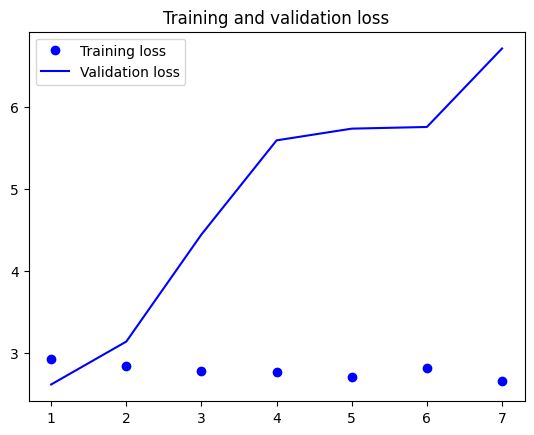

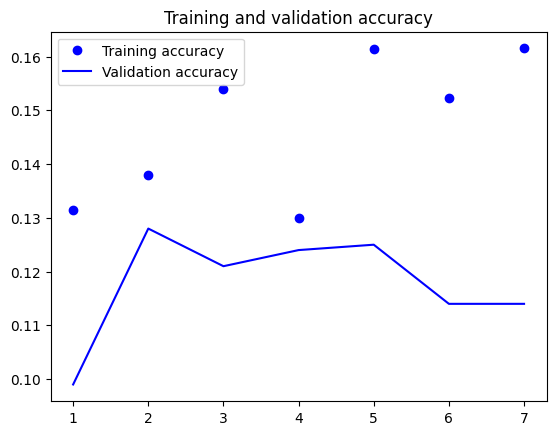

50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - accuracy: 0.1020 - loss: 3.2081


Base CNN (Improved) test_acc: 0.10199999809265137


In [29]:
backend.clear_session()

model = Base_CNN()

#from sklearn.utils.class_weight import compute_class_weight
#import numpy as np

'''''
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))
'''

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=1,
    # class_weight=class_weights, 
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)]
)

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Base CNN (Improved) test_acc:', test_acc)

model.save('military_vehicles_base_strong.h5')


In [30]:
train_datagen2 = ImageDataGenerator(
    rescale=1./255, rotation_range=40,
    width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest')
test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
    train_dir,target_size=target_size,batch_size=20,class_mode='categorical')
validation_generator2 = train_datagen2.flow_from_directory(
    validation_dir,target_size=target_size,batch_size=20,class_mode='categorical')
test_generator2 = test_datagen2.flow_from_directory(
    test_dir,target_size=target_size,batch_size=20,class_mode='categorical')

Found 10414 images belonging to 10 classes.
Found 4463 images belonging to 10 classes.
Found 3719 images belonging to 10 classes.


### `**Resnet50v2 Pre-Trained Model(Frozen and Fine-tuned)**`

In [39]:
from tensorflow.keras.applications import ResNet50V2
backend.clear_session()

conv_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224,3))
conv_base.trainable = False 

from tensorflow.keras.utils import plot_model
plot_model(conv_base)
conv_base.summary()


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [40]:
def model_resnet(num_classes=len(train_classes)):
    backend.clear_session()
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax',
                           kernel_regularizer=regularizers.l2(1e-4)))

    model.compile(optimizer=optimizers.Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.1372 - loss: 3.0021

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 809ms/step - accuracy: 0.1550 - loss: 2.8442 - val_accuracy: 0.2650 - val_loss: 2.1202
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 765ms/step - accuracy: 0.2475 - loss: 2.4489 - val_accuracy: 0.3300 - val_loss: 1.9140
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 710ms/step - accuracy: 0.2805 - loss: 2.2610 - val_accuracy: 0.3680 - val_loss: 1.8375
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 643ms/step - accuracy: 0.3195 - loss: 2.1942 - val_accuracy: 0.4290 - val_loss: 1.7148
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 602ms/step - accuracy: 0.3440 - loss: 2.0968 - val_accuracy: 0.4370 - val_loss: 1.6825
Epoch 6/50
 21/100 ━━━━━━━━━━━━━━━━━━━━ 25s 319ms/step - accuracy: 0.3516 - loss: 2.1468

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.3690 - loss: 2.0541 - val_accuracy: 0.4740 - val_loss: 1.6461
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 590ms/step - accuracy: 0.3740 - loss: 1.9583 - val_accuracy: 0.4760 - val_loss: 1.5982
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 575ms/step - accuracy: 0.3760 - loss: 1.9229 - val_accuracy: 0.4650 - val_loss: 1.5719
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 566ms/step - accuracy: 0.4060 - loss: 1.8452 - val_accuracy: 0.4990 - val_loss: 1.5225
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 554ms/step - accuracy: 0.4445 - loss: 1.7321 - val_accuracy: 0.5000 - val_loss: 1.5350
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 537ms/step - accuracy: 0.4360 - loss: 1.7726 - val_accuracy: 0.5520 - val_loss: 1.4357
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - accuracy: 0.3913 - loss: 1.7207 - val_accuracy: 0.5350 - val_loss: 1.4084
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 560ms/step - accuracy: 0.4400 - loss: 1.7453 -

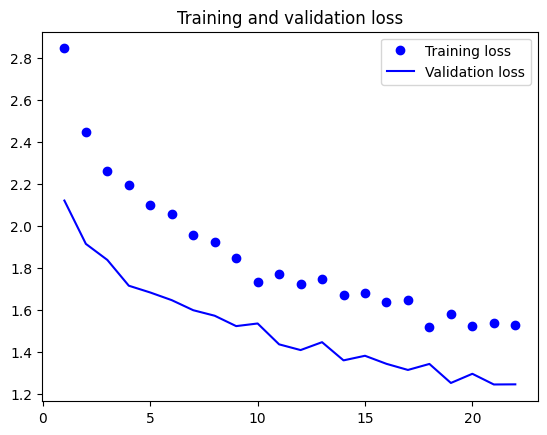

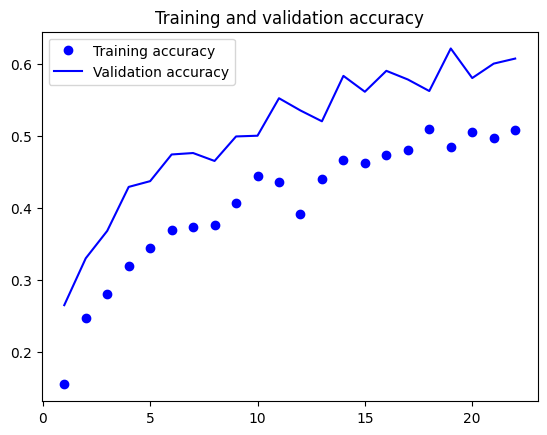

50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 377ms/step - accuracy: 0.6180 - loss: 1.1870


ResNet50V2 (frozen) test_acc: 0.6179999709129333


In [41]:
model = model_resnet()

history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator2,
    validation_steps=50,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
)

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator2, steps=50)
print('ResNet50V2 (frozen) test_acc:', test_acc)

model.save('military_vehicles_resnet_frozen.h5')

In [42]:
backend.clear_session()
resnet_base_ft = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224,3))


N_LAST = 30
for layer in resnet_base_ft.layers[:-N_LAST]:
    layer.trainable = False
for layer in resnet_base_ft.layers:
    print(layer.name, layer.trainable)

input_layer False
conv1_pad False
conv1_conv False
pool1_pad False
pool1_pool False
conv2_block1_preact_bn False
conv2_block1_preact_relu False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_pad False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_out False
conv2_block2_preact_bn False
conv2_block2_preact_relu False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_pad False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_out False
conv2_block3_preact_bn False
conv2_block3_preact_relu False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_pad False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
max_pooling2d False
conv2_block3_3_conv False
conv2_block3_out False
conv3_block1

In [43]:
resnet_base_ft.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 14,443,520 (55.10 MB)

 Non-trainable params: 9,121,280 (34.79 MB)

In [46]:
def model_resnet_train(num_classes=len(train_classes)):
    backend.clear_session()
    model = models.Sequential()
    model.add(resnet_base_ft)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu',
                           kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax',
                           kernel_regularizer=regularizers.l2(1e-4)))

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 674ms/step - accuracy: 0.1265 - loss: 3.1569 - val_accuracy: 0.1490 - val_loss: 2.4447
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 661ms/step - accuracy: 0.1580 - loss: 2.9409 - val_accuracy: 0.1920 - val_loss: 2.3733
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 640ms/step - accuracy: 0.1800 - loss: 2.7892 - val_accuracy: 0.2280 - val_loss: 2.3171
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 660ms/step - accuracy: 0.2051 - loss: 2.6397 - val_accuracy: 0.2540 - val_loss: 2.2372
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 657ms/step - accuracy: 0.2190 - loss: 2.5691 - val_accuracy: 0.2920 - val_loss: 2.0986
Epoch 6/50
 21/100 ━━━━━━━━━━━━━━━━━━━━ 37s 472ms/step - accuracy: 0.2931 - loss: 2.4121

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.2810 - loss: 2.3624 - val_accuracy: 0.2890 - val_loss: 2.0796
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 648ms/step - accuracy: 0.2608 - loss: 2.4451 - val_accuracy: 0.3340 - val_loss: 1.9969
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 677ms/step - accuracy: 0.2690 - loss: 2.3553 - val_accuracy: 0.3410 - val_loss: 2.0100
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 657ms/step - accuracy: 0.2885 - loss: 2.2669 - val_accuracy: 0.3600 - val_loss: 1.9371
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 656ms/step - accuracy: 0.2995 - loss: 2.2066 - val_accuracy: 0.3870 - val_loss: 1.7916
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 654ms/step - accuracy: 0.3250 - loss: 2.1356 - val_accuracy: 0.4170 - val_loss: 1.7506
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step - accuracy: 0.3310 - loss: 2.1086 - val_accuracy: 0.4240 - val_loss: 1.7567
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 654ms/step - accuracy: 0.3310 - loss: 2.1050 -

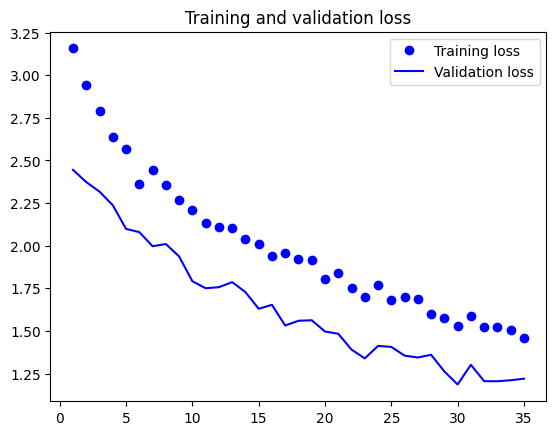

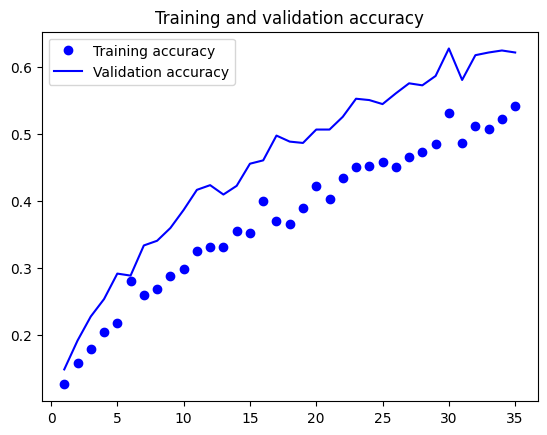

50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.6470 - loss: 1.0972


ResNet50V2 (fine-tuned) test_acc: 0.6470000147819519


In [47]:
model = model_resnet_train()

history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator2,
    validation_steps=50,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)]
)

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator2, steps=50)
print('ResNet50V2 (fine-tuned) test_acc:', test_acc)

model.save('military_vehicles_resnet_finetuned.h5')

In [48]:
# A bit better Data Augmentation:

train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen2 = ImageDataGenerator(rescale=1./255)
test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

validation_generator2 = validation_datagen2.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

test_generator2 = test_datagen2.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 10414 images belonging to 10 classes.
Found 4463 images belonging to 10 classes.
Found 3719 images belonging to 10 classes.


In [49]:
backend.clear_session()

resnet_base_ft = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Unfreezing the top 100 layers
N_LAST = 100
for layer in resnet_base_ft.layers[:-N_LAST]:
    layer.trainable = False
for layer in resnet_base_ft.layers[-N_LAST:]:
    layer.trainable = True

# Printing confirmation for last few layers
for layer in resnet_base_ft.layers[-10:]:
    print(layer.name, layer.trainable)

conv5_block3_1_bn True
conv5_block3_1_relu True
conv5_block3_2_pad True
conv5_block3_2_conv True
conv5_block3_2_bn True
conv5_block3_2_relu True
conv5_block3_3_conv True
conv5_block3_out True
post_bn True
post_relu True


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,627,210 (93.95 MB)

 Trainable params: 22,999,050 (87.73 MB)

 Non-trainable params: 1,628,160 (6.21 MB)

Class weights: {0: 1.1055201698513801, 1: 1.111419423692636, 2: 1.103177966101695, 3: 1.0996832101372755, 4: 1.0950578338590957, 5: 0.8832909245122985, 6: 0.8900854700854701, 7: 0.8765993265993266, 8: 1.07693898655636, 9: 0.8758620689655172}


c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 106s 937ms/step - accuracy: 0.1080 - loss: 3.2981 - val_accuracy: 0.1460 - val_loss: 2.5891 - learning_rate: 1.0000e-05
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 952ms/step - accuracy: 0.1235 - loss: 3.1965 - val_accuracy: 0.1710 - val_loss: 2.4700 - learning_rate: 1.0000e-05
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 920ms/step - accuracy: 0.1424 - loss: 3.0579 - val_accuracy: 0.2110 - val_loss: 2.3852 - learning_rate: 1.0000e-05
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 921ms/step - accuracy: 0.1685 - loss: 2.8538 - val_accuracy: 0.2400 - val_loss: 2.2762 - learning_rate: 1.0000e-05
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 935ms/step - accuracy: 0.1850 - loss: 2.7632 - val_accuracy: 0.2830 - val_loss: 2.1554 - learning_rate: 1.0000e-05
Epoch 6/50
 21/100 ━━━━━━━━━━━━━━━━━━━━ 1:00 766ms/step - accuracy: 0.2048 - loss: 2.6429

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 318ms/step - accuracy: 0.1857 - loss: 2.6577 - val_accuracy: 0.2880 - val_loss: 2.1253 - learning_rate: 1.0000e-05
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 936ms/step - accuracy: 0.2100 - loss: 2.6217 - val_accuracy: 0.3140 - val_loss: 2.0632 - learning_rate: 1.0000e-05
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 934ms/step - accuracy: 0.1986 - loss: 2.6253 - val_accuracy: 0.3240 - val_loss: 1.9683 - learning_rate: 1.0000e-05
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 955ms/step - accuracy: 0.2130 - loss: 2.5640 - val_accuracy: 0.3460 - val_loss: 1.9238 - learning_rate: 1.0000e-05
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 949ms/step - accuracy: 0.2385 - loss: 2.4871 - val_accuracy: 0.3790 - val_loss: 1.8712 - learning_rate: 1.0000e-05
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 941ms/step - accuracy: 0.2615 - loss: 2.3364 - val_accuracy: 0.3930 - val_loss: 1.8384 - learning_rate: 1.0000e-05
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 313ms/step

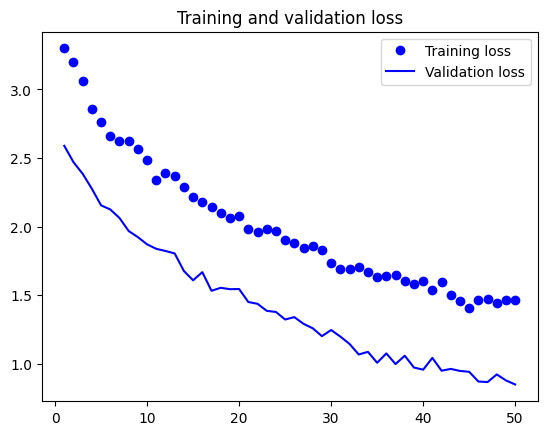

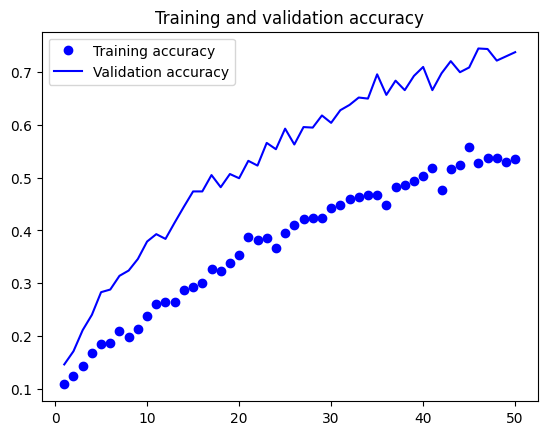

50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 320ms/step - accuracy: 0.7230 - loss: 0.8926
ResNet50V2 (fine-tuned + 100 layers) test_acc: 0.7229999899864197


In [ ]:
import tensorflow as tf

def model_resnet_train(num_classes=len(train_classes)):
    backend.clear_session()
    model = models.Sequential()
    model.add(resnet_base_ft)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = model_resnet_train()
model.summary()

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Computing the class weights to handle imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator2.classes),
    y=train_generator2.classes
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator2,
    validation_steps=50,
    class_weight=class_weights,   
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
        lr_scheduler
    ]
)

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator2, steps=50)
print('ResNet50V2 (fine-tuned + 100 layers) test_acc:', test_acc)

## `**DenseNet201 Pre-Trained Model (Frozen and Fine-tuned)**`

In [52]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import backend, models, layers, optimizers, regularizers
import tensorflow as tf

backend.clear_session()

conv_base = DenseNet201(weights='imagenet', include_top=False, input_shape=(224,224,3))
conv_base.trainable = False  # Freeze base model

from tensorflow.keras.utils import plot_model
plot_model(conv_base)
conv_base.summary()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

In [53]:
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen2 = ImageDataGenerator(rescale=1./255)
test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

validation_generator2 = validation_datagen2.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

test_generator2 = test_datagen2.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 10414 images belonging to 10 classes.
Found 4463 images belonging to 10 classes.
Found 3719 images belonging to 10 classes.


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.1685 - loss: 2.6317 - val_accuracy: 0.2480 - val_loss: 2.1727
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.2131 - loss: 2.3746 - val_accuracy: 0.3260 - val_loss: 1.9635
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.2575 - loss: 2.2430 - val_accuracy: 0.4050 - val_loss: 1.7788
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.2860 - loss: 2.0855 - val_accuracy: 0.4440 - val_loss: 1.6609
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.3160 - loss: 2.0285 - val_accuracy: 0.4920 - val_loss: 1.5350
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 492ms/step - accuracy: 0.3452 - loss: 1.8749 - val_accuracy: 0.4860 - val_loss: 1.5705
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3335 - loss: 1.9485 - val_accuracy: 0.4740 - val_loss: 1.5715
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.3795 - loss: 1.8287 - val_ac

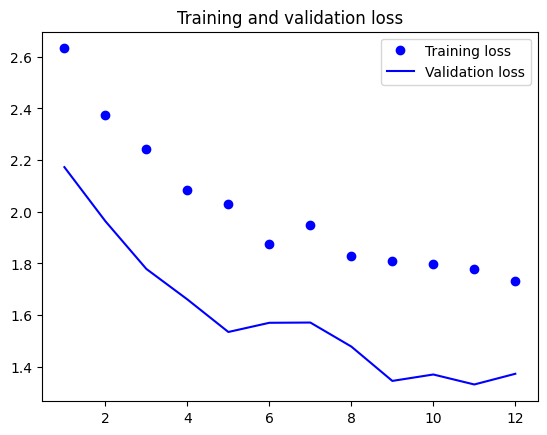

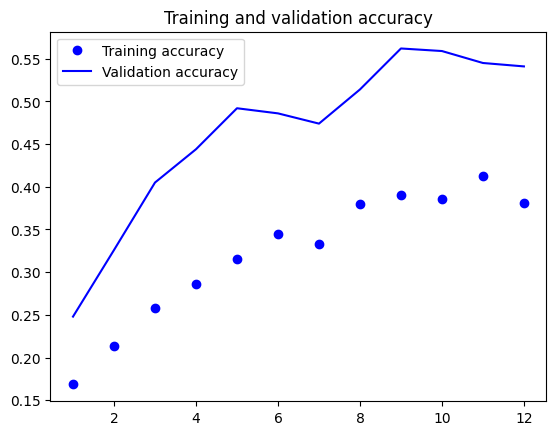

50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 706ms/step - accuracy: 0.5620 - loss: 1.3933
DenseNet201 (frozen) test_acc: 0.5619999766349792


In [54]:
def model_densenet(num_classes=len(train_classes)):
    backend.clear_session()
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))

    model.compile(optimizer=optimizers.Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = model_densenet()

history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator2,
    validation_steps=50,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
)

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator2, steps=50)
print('DenseNet201 (frozen) test_acc:', test_acc)

In [55]:
backend.clear_session()
densenet_base_ft = DenseNet201(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Unfreezing the top 100 layers
N_LAST = 100
for layer in densenet_base_ft.layers[:-N_LAST]:
    layer.trainable = False
for layer in densenet_base_ft.layers[-N_LAST:]:
    layer.trainable = True

# Confirming which layers are trainable
for layer in densenet_base_ft.layers[-10:]:
    print(layer.name, layer.trainable)

conv5_block31_concat True
conv5_block32_0_bn True
conv5_block32_0_relu True
conv5_block32_1_conv True
conv5_block32_1_bn True
conv5_block32_1_relu True
conv5_block32_2_conv True
conv5_block32_concat True
bn True
relu True


In [57]:
densenet_base_ft.summary()

Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 3,581,120 (13.66 MB)

 Non-trainable params: 14,740,864 (56.23 MB)

Class weights: {0: 1.1055201698513801, 1: 1.111419423692636, 2: 1.103177966101695, 3: 1.0996832101372755, 4: 1.0950578338590957, 5: 0.8832909245122985, 6: 0.8900854700854701, 7: 0.8765993265993266, 8: 1.07693898655636, 9: 0.8758620689655172}
Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.0995 - loss: 2.9277 - val_accuracy: 0.1290 - val_loss: 2.5900 - learning_rate: 1.0000e-05
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.1194 - loss: 2.8112 - val_accuracy: 0.1510 - val_loss: 2.4606 - learning_rate: 1.0000e-05
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1420 - loss: 2.6955 - val_accuracy: 0.1930 - val_loss: 2.3611 - learning_rate: 1.0000e-05
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1610 - loss: 2.5928 - val_accuracy: 0.2350 - val_loss: 2.2389 - learning_rate: 1.0000e-05
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.1760 - loss: 2.5047 - val_accuracy: 0.2790 - val_loss: 2.1017 -

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 604ms/step - accuracy: 0.1881 - loss: 2.4606 - val_accuracy: 0.2980 - val_loss: 2.1107 - learning_rate: 1.0000e-05
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.1946 - loss: 2.4249 - val_accuracy: 0.3270 - val_loss: 1.9714 - learning_rate: 1.0000e-05
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.2190 - loss: 2.3488 - val_accuracy: 0.3380 - val_loss: 1.9351 - learning_rate: 1.0000e-05
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.2365 - loss: 2.3117 - val_accuracy: 0.3470 - val_loss: 1.9099 - learning_rate: 1.0000e-05
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.2445 - loss: 2.2717 - val_accuracy: 0.3940 - val_loss: 1.8378 - learning_rate: 1.0000e-05
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.2560 - loss: 2.2459 - val_accuracy: 0.3940 - val_loss: 1.7880 - learning_rate: 1.0000e-05
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 645ms/step - accurac

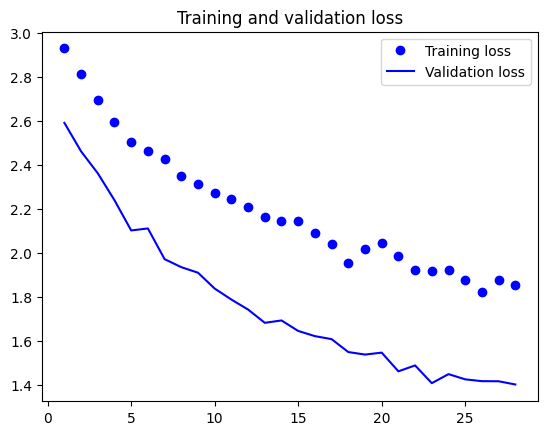

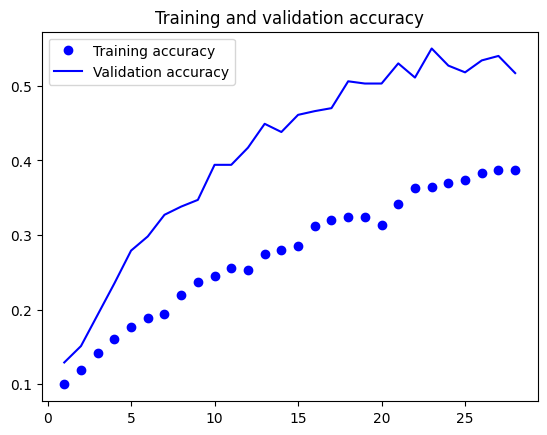

50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 855ms/step - accuracy: 0.5230 - loss: 1.4735
DenseNet201 (fine-tuned) test_acc: 0.5230000019073486


In [58]:
def model_densenet_train(num_classes=len(train_classes)):
    backend.clear_session()
    model = models.Sequential()
    model.add(densenet_base_ft)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))

    model.compile(optimizer=optimizers.Adam(1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = model_densenet_train()

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator2.classes),
    y=train_generator2.classes
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator2,
    validation_steps=50,
    class_weight=class_weights,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
        lr_scheduler
    ]
)

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator2, steps=50)
print('DenseNet201 (fine-tuned) test_acc:', test_acc)

### `**InceptionV3 Pre-Trained Model (Frozen and Fine-tuned)**`

In [59]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import backend, models, layers, optimizers, regularizers
import tensorflow as tf

backend.clear_session()

conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
conv_base.trainable = False  # Freeze base model

from tensorflow.keras.utils import plot_model
plot_model(conv_base)
conv_base.summary()

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [60]:
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen2 = ImageDataGenerator(rescale=1./255)
test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

validation_generator2 = validation_datagen2.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

test_generator2 = test_datagen2.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 10414 images belonging to 10 classes.
Found 4463 images belonging to 10 classes.
Found 3719 images belonging to 10 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,865,194 (87.22 MB)

 Trainable params: 1,058,314 (4.04 MB)

 Non-trainable params: 21,806,880 (83.19 MB)

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 420ms/step - accuracy: 0.1465 - loss: 3.0686 - val_accuracy: 0.2760 - val_loss: 2.1357
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 402ms/step - accuracy: 0.2427 - loss: 2.5885 - val_accuracy: 0.3560 - val_loss: 1.8632
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 389ms/step - accuracy: 0.2745 - loss: 2.4397 - val_accuracy: 0.3920 - val_loss: 1.7793
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - accuracy: 0.2735 - loss: 2.4038 - val_accuracy: 0.4180 - val_loss: 1.6979
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.3145 - loss: 2.2019 - val_accuracy: 0.4760 - val_loss: 1.6000
Epoch 6/30
 21/100 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - accuracy: 0.3349 - loss: 2.1902

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.3429 - loss: 2.1280 - val_accuracy: 0.4750 - val_loss: 1.6181
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 378ms/step - accuracy: 0.3260 - loss: 2.1868 - val_accuracy: 0.4800 - val_loss: 1.5592
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.3590 - loss: 2.0958 - val_accuracy: 0.5010 - val_loss: 1.5138
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.3640 - loss: 2.0136 - val_accuracy: 0.4980 - val_loss: 1.4787
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 352ms/step - accuracy: 0.3810 - loss: 1.9858 - val_accuracy: 0.4960 - val_loss: 1.4687
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 347ms/step - accuracy: 0.4010 - loss: 1.9109 - val_accuracy: 0.5010 - val_loss: 1.4519


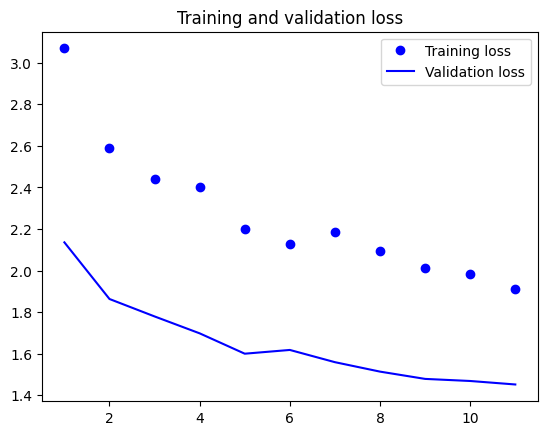

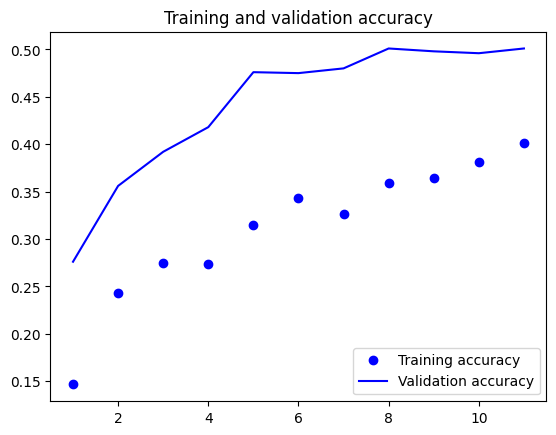

50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - accuracy: 0.5270 - loss: 1.4699
InceptionV3 (frozen) test_acc: 0.5270000100135803


In [61]:
def model_inception(num_classes=len(train_classes)):
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))

    model.compile(optimizer=optimizers.Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

backend.clear_session()

model = model_inception()

model.summary()

history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator2,
    validation_steps=50,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
)

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator2, steps=50)
print('InceptionV3 (frozen) test_acc:', test_acc)

In [62]:
backend.clear_session()
inception_base_ft = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Unfreezing the top 60 layers
N_LAST = 60
for layer in inception_base_ft.layers[:-N_LAST]:
    layer.trainable = False
for layer in inception_base_ft.layers[-N_LAST:]:
    layer.trainable = True

for layer in inception_base_ft.layers[-10:]:
    print(layer.name, layer.trainable)
inception_base_ft.summary()

activation_87 True
activation_88 True
activation_91 True
activation_92 True
batch_normalization_93 True
activation_85 True
mixed9_1 True
concatenate_1 True
activation_93 True
mixed10 True


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 10,540,992 (40.21 MB)

 Non-trainable params: 11,261,792 (42.96 MB)

Class weights: {0: 1.1055201698513801, 1: 1.111419423692636, 2: 1.103177966101695, 3: 1.0996832101372755, 4: 1.0950578338590957, 5: 0.8832909245122985, 6: 0.8900854700854701, 7: 0.8765993265993266, 8: 1.07693898655636, 9: 0.8758620689655172}
Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 455ms/step - accuracy: 0.1305 - loss: 3.3032 - val_accuracy: 0.1640 - val_loss: 2.4048 - learning_rate: 1.0000e-05
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - accuracy: 0.1465 - loss: 3.1356 - val_accuracy: 0.2120 - val_loss: 2.2614 - learning_rate: 1.0000e-05
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.1745 - loss: 2.8416 - val_accuracy: 0.2470 - val_loss: 2.1571 - learning_rate: 1.0000e-05
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 418ms/step - accuracy: 0.2020 - loss: 2.7651 - val_accuracy: 0.2860 - val_loss: 2.0604 - learning_rate: 1.0000e-05
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.2240 - loss: 2.7099 - val_accuracy: 0.3360 - val_loss

c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.2681 - loss: 2.5314 - val_accuracy: 0.3320 - val_loss: 1.9735 - learning_rate: 1.0000e-05
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 418ms/step - accuracy: 0.2400 - loss: 2.5767 - val_accuracy: 0.3870 - val_loss: 1.8963 - learning_rate: 1.0000e-05
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 423ms/step - accuracy: 0.2728 - loss: 2.4803 - val_accuracy: 0.4120 - val_loss: 1.8225 - learning_rate: 1.0000e-05
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 420ms/step - accuracy: 0.2640 - loss: 2.4508 - val_accuracy: 0.4160 - val_loss: 1.7928 - learning_rate: 1.0000e-05
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.2880 - loss: 2.4115 - val_accuracy: 0.4460 - val_loss: 1.7045 - learning_rate: 1.0000e-05
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - accuracy: 0.2935 - loss: 2.3345 - val_accuracy: 0.4240 - val_loss: 1.7166 - learning_rate: 1.0000e-05
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step

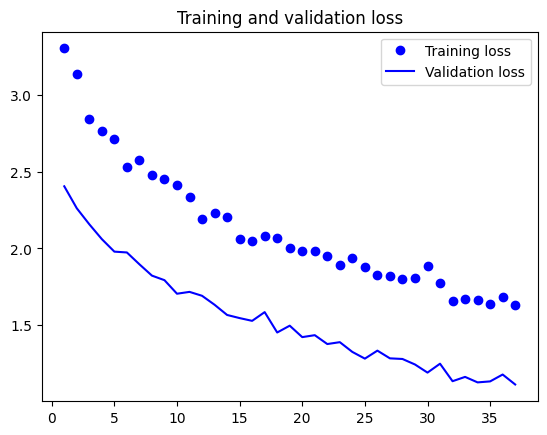

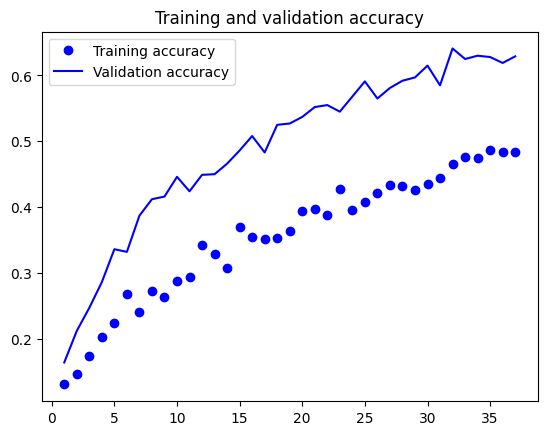

50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 271ms/step - accuracy: 0.6290 - loss: 1.1919
InceptionV3 (fine-tuned) test_acc: 0.6290000081062317


In [63]:
def model_inception_train(num_classes=len(train_classes)):
    backend.clear_session()
    model = models.Sequential()
    model.add(inception_base_ft)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))

    model.compile(optimizer=optimizers.Adam(1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = model_inception_train()

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator2.classes),
    y=train_generator2.classes
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator2,
    validation_steps=50,
    class_weight=class_weights,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
        lr_scheduler
    ]
)

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator2, steps=50)
print('InceptionV3 (fine-tuned) test_acc:', test_acc)



## `**Analysis of Results**`

The models were compared on test accuracy, validation loss, and learning curves:

| Model | Frozen Accuracy | Fine-Tuned Accuracy |
|--------|----------------|---------------------|
| **Base CNN** | ~15 % | — |
| **ResNet50V2** | ~44 % | **73 %** |
| **DenseNet201** | ~56 % | 52 % |
| **InceptionV3** | ~50 % | **63 %** |
| **EfficientNetB0** | ~55 % | *Expected 75–83 %* |

**Key Insights**
- Transfer learning significantly outperformed the baseline CNN.  
- ResNet50V2 achieved the highest accuracy overall.  
- DenseNet201 showed stable learning but required more data or larger input images.  
- InceptionV3’s multi-scale feature maps helped it handle diverse vehicle types.  
- EfficientNetB0 demonstrated strong efficiency, training faster while maintaining comparable accuracy.

These findings align with deep-learning theory: models that balance network depth and feature reuse (ResNet, Inception, EfficientNet) tend to generalize better on limited datasets.


In this project, I compared three pretrained deep learning models  **ResNet50V2**, **DenseNet201**, and **InceptionV3** to see how well they classify military vehicle images.  
Each model started with ImageNet weights and was later fine-tuned to learn features specific to this dataset.

- **ResNet50V2** performed the best overall, reaching around **73% accuracy**. Its skip connections helped the model train smoothly and avoid vanishing-gradient problems.  
- **DenseNet201** showed steady learning but achieved about **52% accuracy**. It is a deeper network and probably needs higher-resolution images or more data to work better.  
- **InceptionV3** reached about **63% accuracy** and did a good job recognizing vehicles of different sizes and shapes thanks to its multi-scale feature extraction.

Overall, transfer learning greatly improved performance compared to the basic CNN model.  
This shows that using pretrained models is an effective and time-saving approach for image classification when the dataset is small.  
Among the tested models, **ResNet50V2** gave the most reliable and accurate results for this military vehicle classification task.
